In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [53]:
from sklearn.datasets import load_boston

In [61]:
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.manifold import TSNE

In [70]:
from sklearn.cluster import KMeans

In [54]:
db = load_boston()

In [55]:
db.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [56]:
data = db.data
names = db.feature_names
price = db.target

In [57]:
X = pd.DataFrame(data, columns = names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [58]:
y = pd.DataFrame(price, columns = ["Price"])
y.head()

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [62]:
scaler = StandardScaler()

In [63]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = names)

In [64]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = names)

In [66]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [68]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

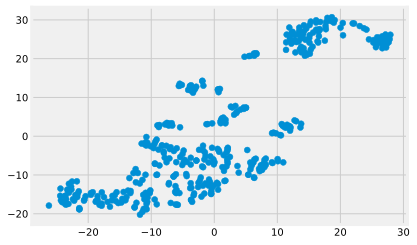

In [69]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

In [74]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [75]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [76]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [77]:
X_train.loc[labels_train==0, 'CRIM'].mean()

0.07356558139534886

In [78]:
X_train.loc[labels_train==1, 'CRIM'].mean()

10.797028425196853

In [79]:
X_train.loc[labels_train==2, 'CRIM'].mean()

0.42166020942408367

In [84]:
y_train.loc[labels_train==0, 'Price'].mean()

27.788372093023252

In [85]:
y_train.loc[labels_train==1, 'Price'].mean()

16.165354330708666

In [86]:
y_train.loc[labels_train==2, 'Price'].mean()

24.958115183246072

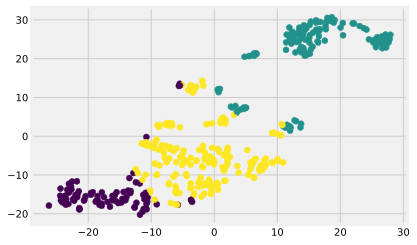

In [87]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

In [105]:
labels_train_test = kmeans.predict(X_test_scaled)

In [106]:
pd.value_counts(labels_train_test)

1    53
2    35
0    14
dtype: int64

In [107]:
X_test.loc[labels_train_test==0, 'CRIM'].mean()

0.08618571428571427

In [108]:
X_test.loc[labels_train_test==1, 'CRIM'].mean()

0.25200716981132076

In [109]:
X_test.loc[labels_train_test==2, 'CRIM'].mean()

10.165531142857143

In [110]:
y_test.loc[labels_train_test==0, 'Price'].mean()

33.871428571428574

In [111]:
y_test.loc[labels_train_test==1, 'Price'].mean()

21.552830188679245

In [112]:
y_test.loc[labels_train_test==2, 'Price'].mean()

16.437142857142856